In [1]:
from sympy import symbols, cos, lambdify, diff, pi, factorial, exp
# from sympy import oo, integrate, solve # For manual testing only
import numpy as np
import scipy.constants as kn
from scipy.constants import physical_constants as pkn 
from scipy.constants import find # Just for find constants info at: scipy.org/scipy.constants.find
import matplotlib.pyplot as plt
from matplotlib import cm
from sympy.abc import n, x, a, r, theta, phi
import math


In [2]:
# Version 2 with performance in sympy module

# Definitions level 1

a0=pkn['Bohr radius'][0] # Bohr radius

# Definitions level 2

# Creating P_l(x)  corresponding to Legendre Polynomials in the Rodrigues' form 
def Plx(l,x):
    return 1/(2**l*factorial(l))*diff((x**2-1)**l,x,l)

# Tested with page 47 of the Cambridge formulas book # It works

# Creating P_l^m(x) corresponding to Associated Legendre functions
def Plmx_possitive_part(l,m,x,theta):
    return ((-1)**m*(1-x**2)**(m/2)*diff(Plx(l,x),x,m)).subs(x,cos(theta))

def Plmx(l,m,x,theta):
    if m>=0:
        return Plmx_possitive_part(l,m,x,theta)
    if m<0:
        return (-1)**m*Plmx_possitive_part(l,abs(m),x,theta)

# Tested with page 48 of the Cambridge formulas book # It works

# Associated Laguerre polynomial formula ## Correct Issue #1
def Lab(n,l):
    aux_legendre=[]
    for k in range(n-l):
        L=(factorial(n+l)*(-x)**k)/(factorial(2*l+1+k)*factorial(n-l-1-k)*factorial(k))
        aux_legendre.append(L)
    return sum(aux_legendre)
# Creating Y_l^m(theta,phi), corresponding to the total angular contribution in the wavefunction
def Ylm_theta_phi(l,m,x,theta,phi):
    return ((2*l+1)/(4*pi)*factorial(l-abs(m))/factorial(l+abs(m)))**(1/2)*Plmx(l,m,x,theta)*exp(1j*m*phi)

# Tested with page 49 of the Cambridge formulas book # It works

# Creating R_{nl}(r), being the total radial contribution in the wavefunction
def Rnlr(n,l,x):
    return (factorial(n-l-1)/(2*n*factorial(n+l)))**(1/2)*(2/(a*n))**(3/2)*x**l*exp(-x/2)*Lab(n,l)

# Tested using pages 49 and 96 and extracting the product # It works 

# Definitions level 4 

# The next function correspond to the whole wavefunction 
def psi_nlm_theta_phi(n,l,m,x,theta,phi):
    return Rnlr(n,l,x).subs(x,2*r/(n*a))*Ylm_theta_phi(l,m,x,theta,phi)

def Psi(n,l,m):
    return psi_nlm_theta_phi(n,l,m,x,theta,phi)

# Tested with page 96 of the Cambridge formulas book # It works

In [3]:
psi_1=r*psi_nlm_theta_phi(2,0,0,x,pi/4,pi/6) # The wavefunction evaluation with the three quantum numbers

In [4]:
res=10000 ## The resolution of the plots
psi=lambdify([r,a],psi_1,'numpy') # Integration of the given absolute squared value of wavefunction must be equal 1
psi2=lambdify([r,a],psi_1/r,'numpy')
psi_1

0.176776695296637*pi**(-0.5)*r*(2 - r/a)*(1/a)**1.5*exp(-r/(2*a))

In [5]:
rx=np.linspace(0,1.75e-8,res) ## Creates a range of numbers considering n=10
psi_y=psi(rx,a0) ## Function r*psi array eval
loc_max=int(np.where(abs(psi_y)**2==max(abs(psi_y)**2))[0]) ## Returns the max of the function 
loc_min_follow=int(np.where(abs(psi_y[loc_max:])**2 < 1e6)[0][11]) ## returns the minimun value of the function after the maximun
loc_min=loc_max+loc_min_follow
#x_lim=rx[loc_min] # It has been used for locate the data between limits

## Optimize functions limits

rx=np.linspace(0,rx[loc_min],res)
psi_y=abs(psi(rx,a0))**2 ## Function abs(r*psi)**2 array eval
psi_y2=psi2(rx,a0) ## Function psi array eval

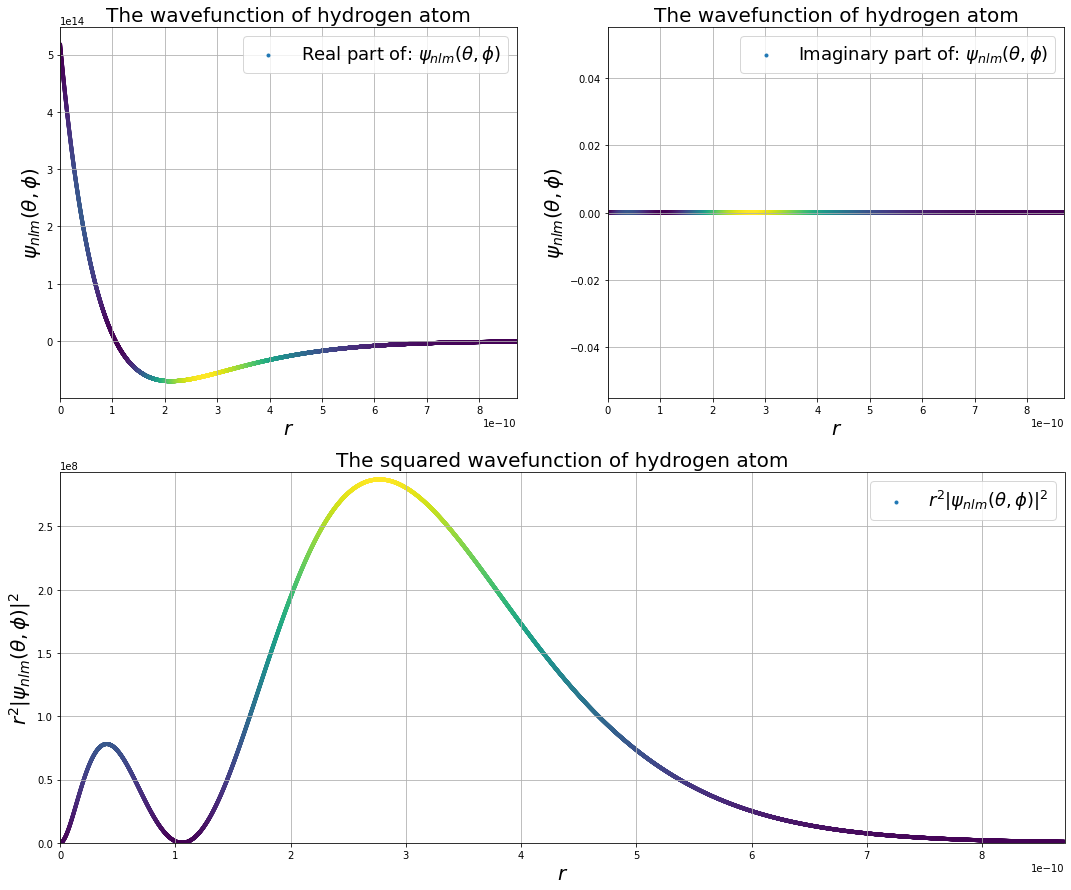

In [6]:
colors_psi=psi_y/max(psi_y) # The color variation in these plots

plt.figure(figsize=[18,15])

# Plot of psi
plt.subplot(221)
plt.scatter(rx,np.real(psi_y2),c=colors_psi,cmap=cm.viridis, marker='.', label='Real part of: $\psi_{nlm}(\\theta,\phi)$')
#plt.ylim(1.02*min(psi_y2),1.02*max(psi_y2))
plt.xlim(0,rx[-1])
plt.title('The wavefunction of hydrogen atom',size=20)
plt.xlabel('$r$',size=20)
plt.ylabel('$\psi_{nlm}(\\theta,\phi)$', size=20)
plt.legend(loc='best', prop={'size': 18})
plt.grid()

# Plot of psi
plt.subplot(222)
plt.scatter(rx,np.imag(psi_y2),c=colors_psi,cmap=cm.viridis, marker='.', label='Imaginary part of: $\psi_{nlm}(\\theta,\phi)$')
#plt.ylim(1.02*min(psi_y2),1.02*max(psi_y2))
plt.xlim(0,rx[-1])
plt.title('The wavefunction of hydrogen atom',size=20)
plt.xlabel('$r$',size=20)
plt.ylabel('$\psi_{nlm}(\\theta,\phi)$', size=20)
plt.legend(loc='best', prop={'size': 18})
plt.grid()

# Plot of abs(r*psi)**2
plt.subplot(212)
plt.scatter(rx,psi_y,c=colors_psi,cmap=cm.viridis, marker='.', label='$r^2|\psi_{nlm}(\\theta,\phi)|^2$')
plt.ylim(0,max(psi_y)*1.02)
plt.xlim(0,rx[-1])
plt.title('The squared wavefunction of hydrogen atom',size=20)
plt.xlabel('$r$',size=20)
plt.ylabel('$r^2|\psi_{nlm}(\\theta,\phi)|^2$', size=20)
plt.legend(loc='best', prop={'size': 18})
plt.grid()

## Remember to cange nlm in wavefunction
## To save this plot enable this line
## plt.savefig('psi_71-1.jpg', dpi=300)

In [7]:
# Warning: Code must be optimized 19/05/2021
res=1000 # Due to resolution troubles a second stage of definition is needed 16/05/2021
rx=np.linspace(0,1.75e-8,res) ## Creates a range of numbers considering n=10
psi_y=psi(rx,a0) ## Function r*psi array eval
loc_max=int(np.where(abs(psi_y)**2==max(abs(psi_y)**2))[0]) ## Returns the max of the function 
loc_min_follow=int(np.where(abs(psi_y[loc_max:])**2 < 1e6)[0][11]) ## returns the minimun value of the function after the maximun
loc_min=loc_max+loc_min_follow
#x_lim=rx[loc_min] # It has been used for locate the data between limits

## Optimize functions limits

rx=np.linspace(0,rx[loc_min],res)
psi_y=abs(psi(rx,a0))**2 ## Function abs(r*psi)**2 array eval
psi_y2=psi2(rx,a0) ## Function psi array eval

In [8]:
# Idea: Use skLearn or maybe other library to get the radial distribution
# Solution: Nothing of this was needed, I solved this with matplotlib
# Now I need an algorithm to link the probability of the wavefunction squared with the radius 
# For this I'll create 100 points in the maximun value, 99 points in the maximun less 1 value
# 98 for the third and so on, afther that I need to make 100 positions for those values 

# This code is made for test the distribution set, because it can't get clear through other plots
#plt.figure(figsize=[12,12])
#plt.hist2d(rx2, rx2, bins=100)
#plt.show()
#u=[] # Control variable len(rx2), sum(u), (u[-1]+u[0])*len(u)/2, len(u), u[-1]+u[0]

upsiy=psi_y*1 # Dulplicate the psi_y variable, so you can freely operate with this variable 
start=100 #Determines minimun values
rx2=np.array([]) # Create an empty array to fill it with the desired quatinties of rx
for k in range(start,res): # Choose start value equal 100 to reflect the nodal points of the wavefunction
    aux1=np.where(upsiy == max(upsiy))[0][0] #, u.append(k) #Enable when u is active
    aux2=np.ones(res+start-k)*rx[aux1]
    rx2=np.append(rx2,aux2)
    upsiy[aux1]=0

## Check the difference between the lenght of the rx2 vector and the mathematical formula 15/05/2021
## This difference is about 0.11% and not affect the code or its function
## it is due lengt in vector "u" is 901 instead of 900


In [9]:
# Next step: pair those r values with random angles to pair with
res2=100000 # Must be an integer
polar_psi_r=np.array([])
polar_psi_r=np.append(polar_psi_r,np.random.choice(rx2,res2))
polar_psi_angle=np.linspace(-np.pi,np.pi,res2)


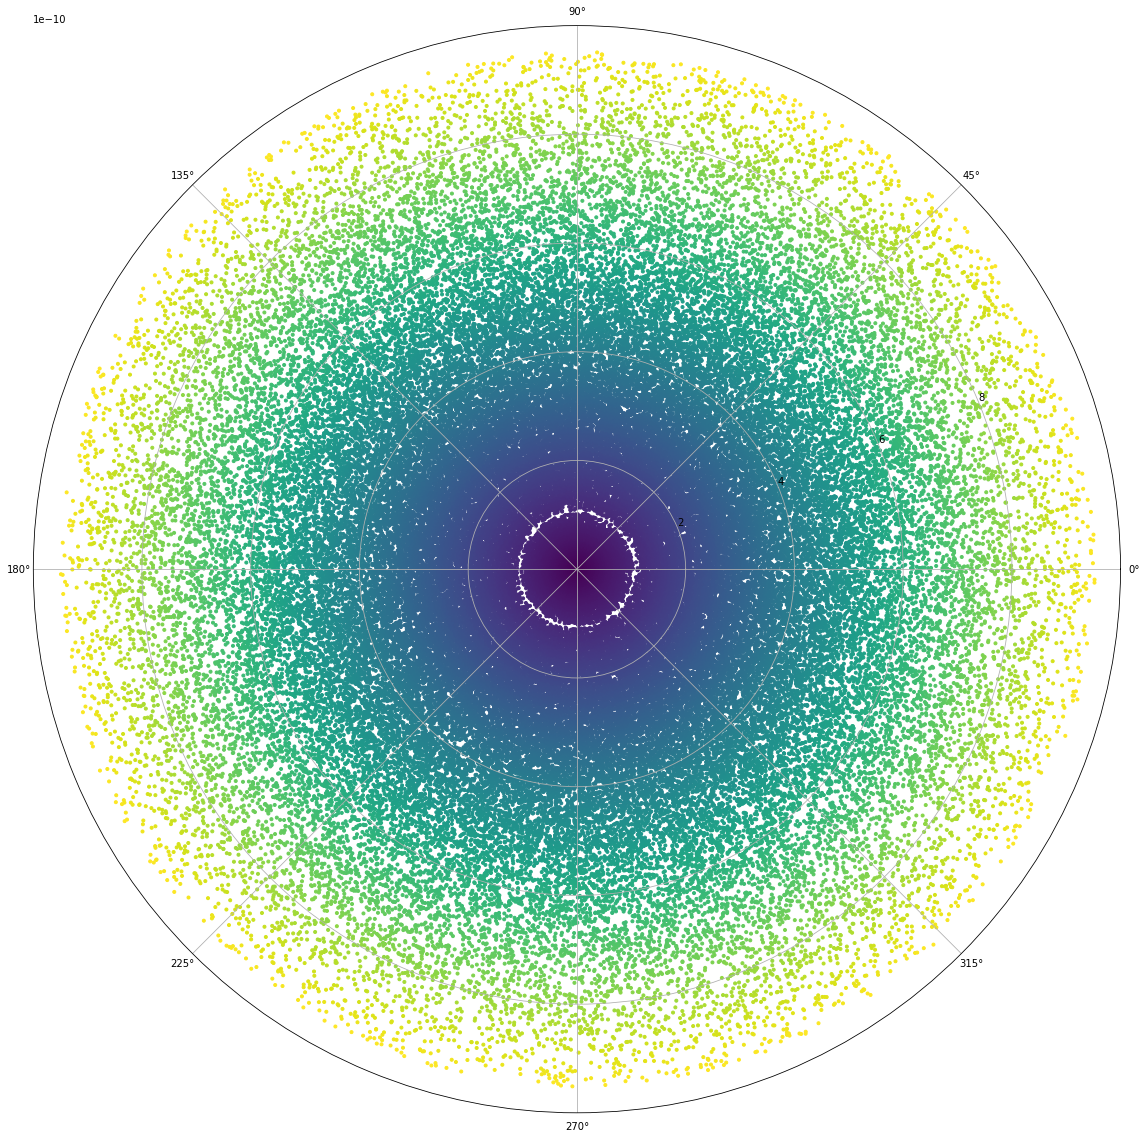

In [10]:
colors_psi=polar_psi_r/max(polar_psi_r)
plt.figure(figsize=[20,20]).add_subplot(projection='polar')
plt.scatter(polar_psi_angle,polar_psi_r,c=colors_psi,cmap=cm.viridis, marker='.')#, alpha=0.65)
#plt.title('Atom', size=20)
plt.savefig('psi_71-1-cividis.jpg',dpi=300)